<a href="https://colab.research.google.com/github/yqz5514/Reg-Stats-Coding-Project/blob/main/Number_of_Final_Major_Rules_Published_by_Pres_Year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("R.utils")
library("R.utils")
# runtime: within 1 min

install.packages('png') # use for load png file
install.packages('showtext') #directly works on .OTF fonts, for custom font on ggplot
install.packages('ggpattern') # for plot pattern
install.packages('ggrepel') # legend
install.packages('gcookbook')
# load packages
library(ggplot2)
library(showtext)
library(png)
library(ggpattern)
library(tidyr)
library(ggrepel)
library(dplyr)
library(scales)
library(gcookbook)

# Dowloading logo and font style for reg stats plots
download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/gw_ci_rsc_2cs_pos.png",
              "gw_ci_rsc_2cs_pos.png.gz")
download.file("https://github.com/yqz5514/Reg-Stats-Coding-Project/raw/main/a-avenir-next-lt-pro.otf",
              "a-avenir-next-lt-pro.otf.gz")
gunzip('gw_ci_rsc_2cs_pos.png.gz')
gunzip('a-avenir-next-lt-pro.otf.gz')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [ ]:
# standarlized funciton
mytheme <- theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, vjust=-2, margin = margin(b = 40, unit = "pt"), size=20),
    axis.text.x = element_text(angle = 65, hjust = 1, vjust = 1,size=12),
    legend.position = "none",
    panel.grid.major.x = element_blank(),
    axis.text.y = element_text(size=12),
    axis.title.y = element_text(size = 12, angle = 90, vjust = 1),
    panel.grid.major.y = element_line(color = "#E0E0E0", linetype = "solid"),
    panel.grid.minor = element_blank(),
    text =element_text(family = "avenir_lt_pro"),
    plot.caption = element_text(hjust = 1, margin = margin(t = 0, l = 6, unit = "pt"),size=11),
    plot.margin = margin(50, 50, 50, 50),
    axis.ticks.x = element_line()
  )


In [ ]:
download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/data/major_rules_presidential_year_03172023.csv",
              "major_rules_presidential_year_03172023.csv.gz")
gunzip('major_rules_presidential_year_03172023.csv.gz')

In [ ]:
#@title load custome font to system
font_add("avenir_lt_pro","a-avenir-next-lt-pro.otf")
showtext_auto()

In [ ]:
sig <- read.csv("/content/major_rules_presidential_year_03172023.csv")

sig <- sig[c(2:28),c(0:5)]
# issue: there are always some rows do not have data, have description/annotation

colnames(sig) <- c("year", "totalmr", "tmrexcludnonsig","party","fay")

sig$totalmr<- as.numeric(sig$totalmr)
sig$tmrexcludnonsig <- as.numeric(sig$tmrexcludnonsig)

# make party factor variable
sig$party <- as.factor(sig$party)
current_date <- format(Sys.Date(), "%B %d, %Y")

#logo
get_png <- function(filename) {
  grid::rasterGrob(png::readPNG(filename),interpolate = TRUE)
}
l <- get_png("gw_ci_rsc_2cs_pos.png")

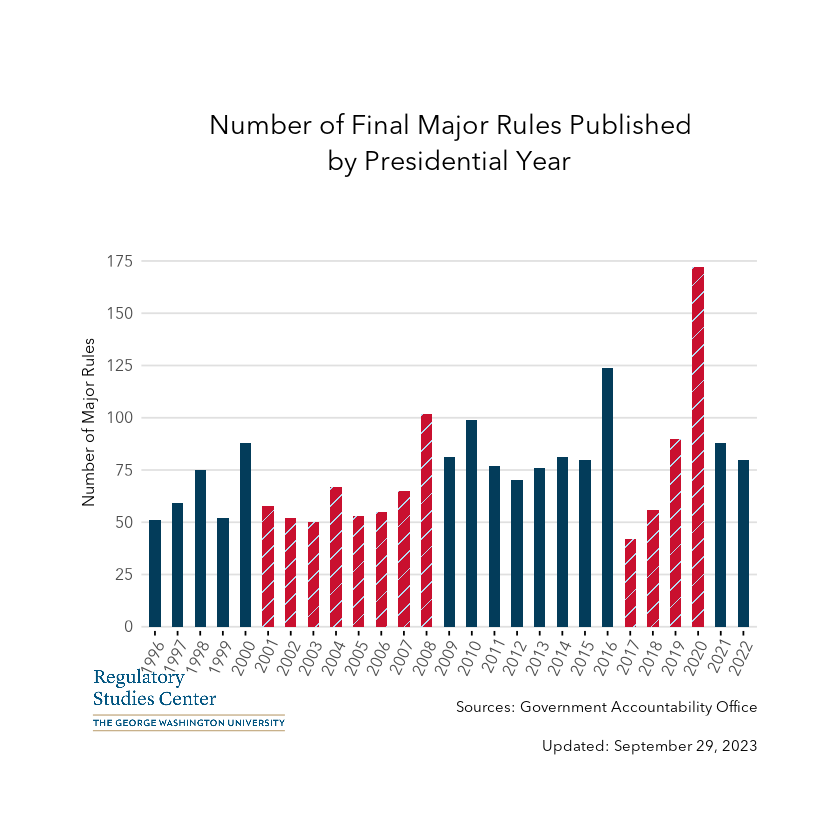

In [ ]:

caption_text <- paste("Sources: Government Accountability Office \n\nUpdated:", current_date)
wrapped_caption <- paste(strwrap(caption_text, width = 95), collapse = "\n")

bar1 <-
  ggplot(sig, aes(x = year, y = totalmr, fill= party,pattern = party)) +
  geom_bar_pattern(stat = "identity", width = 0.5,
                   pattern_color = NA,
                    pattern_fill = "#B2DDF4",
                    pattern_angle = 45,
                    pattern_density = 0.1,
                    pattern_spacing = 0.03,
                   # pattern_key_scale_factor = 1
                   ) +
  scale_fill_manual(values = c("#C9102F","#033C5A")) +
  scale_pattern_manual(values = c("0"="stripe", "1"="none")) +
  theme_minimal() +
  ggtitle("Number of Final Major Rules Published \nby Presidential Year") +
  ylab("Number of Major Rules") +
  xlab("") +
  scale_y_continuous(breaks = seq(0, max(sig$totalmr) + 25, by = 25), expand = c(0, 0),
                     limits = c(-2, max(sig$totalmr) + 25)) +
  # scale_y_continuous()
  annotation_custom(l, xmin = -5, xmax = 10, ymin = -20, ymax = -50) + # for logo
  coord_cartesian(clip = "off") +
  mytheme +
  labs(caption = wrapped_caption)
bar1

ggsave("bar1.pdf", plot = bar1, width = 12, height = 9, dpi = 300)